# Carry out MFA

## Calculate MFA

In [1]:
from pandas import read_csv
from prince import MFA
customer_churn = read_csv('../data/Customer_churn_discrete.csv', index_col="customerID")
labels = customer_churn['Churn']
customer_churn = customer_churn.drop(['Churn'], axis='columns')

### Split data into groups

In [3]:
oldNumeric = {"MonthlyCharges","TotalCharges","tenure"}
groups = {"categorical":list(set(customer_churn.columns)-oldNumeric),"old":list(oldNumeric)}

### Calculate inertia

In [4]:
mfa = MFA(groups=groups,n_components=5)
mfa.fit(customer_churn)
mfa.explained_inertia_

array([0.24570218, 0.16857398, 0.11663758, 0.08989994, 0.04239116])

In [5]:
from numpy import cumsum
cumsum(mfa.explained_inertia_)

array([0.24570218, 0.41427616, 0.53091375, 0.62081369, 0.66320485])

### Save results

In [6]:
from update import update_csv
update_csv("MFA",mfa.explained_inertia_)

### Visualize results

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (24.57% inertia)', ylabel='Component 1 (16.86% inertia)'>

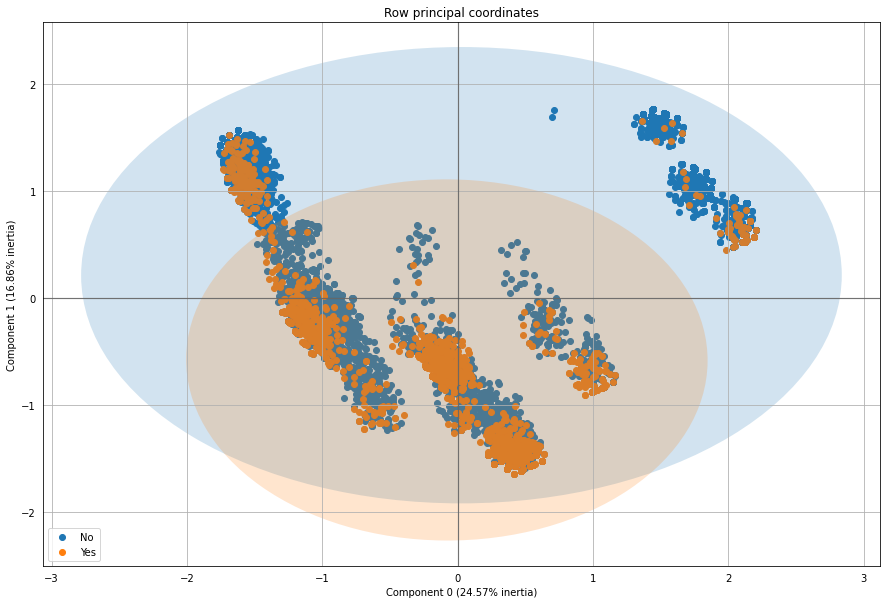

In [7]:
mfa.plot_row_coordinates(customer_churn,figsize=(15, 10),color_labels=labels)

## Measure time

In [7]:
from update import measure_fit_time,measure_transform_time
measure_fit_time("MFA",lambda x: MFA(groups=groups,n_components=5).fit(x),customer_churn)
prefited_MFA = MFA(groups=groups,n_components=5)
prefited_MFA.fit(customer_churn)
measure_transform_time("MFA",lambda x: prefited_MFA.transform(x),customer_churn)